In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Project.csv")


In [32]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics
display(df.describe())

# Correlation with target variable
corr = df.corr(numeric_only=True)['Rating Average'].sort_values(ascending=False)
print("Correlation with 'Rating Average':\n", corr)


Missing values:
 ID                    0
Name                  0
Year Published        0
Min Players           0
Max Players           0
Play Time             0
Min Age               0
Users Rated           0
Rating Average        0
BGG Rank              0
Complexity Average    0
Owned Users           0
Mechanics             0
Domains               0
dtype: int64


,ID,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,151121.101010,2012.111111,1.626263,4.434343,128.636364,12.636364,25939.242424,8.058687,50.000000,3.299495,35359.050505
std,81163.690318,14.974052,0.581796,1.126323,108.786953,1.534997,18904.749043,0.287639,28.722813,0.717535,26435.155086
min,42.000000,1876.000000,1.000000,2.000000,15.000000,8.000000,3295.000000,7.610000,1.000000,1.250000,7209.000000
25%,99764.000000,2011.500000,1.000000,4.000000,90.000000,12.000000,12787.000000,7.835000,25.500000,2.825000,17006.000000
50%,169786.000000,2015.000000,2.000000,4.000000,120.000000,13.000000,20240.000000,8.040000,50.000000,3.380000,27093.000000
75%,205348.000000,2017.000000,2.000000,5.000000,150.000000,14.000000,30454.000000,8.190000,74.500000,3.820000,41495.500000
max,291457.000000,2020.000000,3.000000,8.000000,1000.000000,17.000000,102214.000000,8.870000,99.000000,4.630000,155312.000000


Correlation with 'Rating Average':
 Rating Average        1.000000
ID                    0.448366
Complexity Average    0.426239
Min Age               0.349271
Play Time             0.229973
Year Published        0.225575
Max Players          -0.213973
Owned Users          -0.253101
Min Players          -0.300523
Users Rated          -0.318500
BGG Rank             -0.718701
Name: Rating Average, dtype: float64


In [33]:
#Dropped columns
df = df.drop(columns=["ID", "Name"])

In [34]:
#Check Columns
df.columns

Index(['Year Published', 'Min Players', 'Max Players', 'Play Time', 'Min Age',
       'Users Rated', 'Rating Average', 'BGG Rank', 'Complexity Average',
       'Owned Users', 'Mechanics', 'Domains'],
      dtype='object')

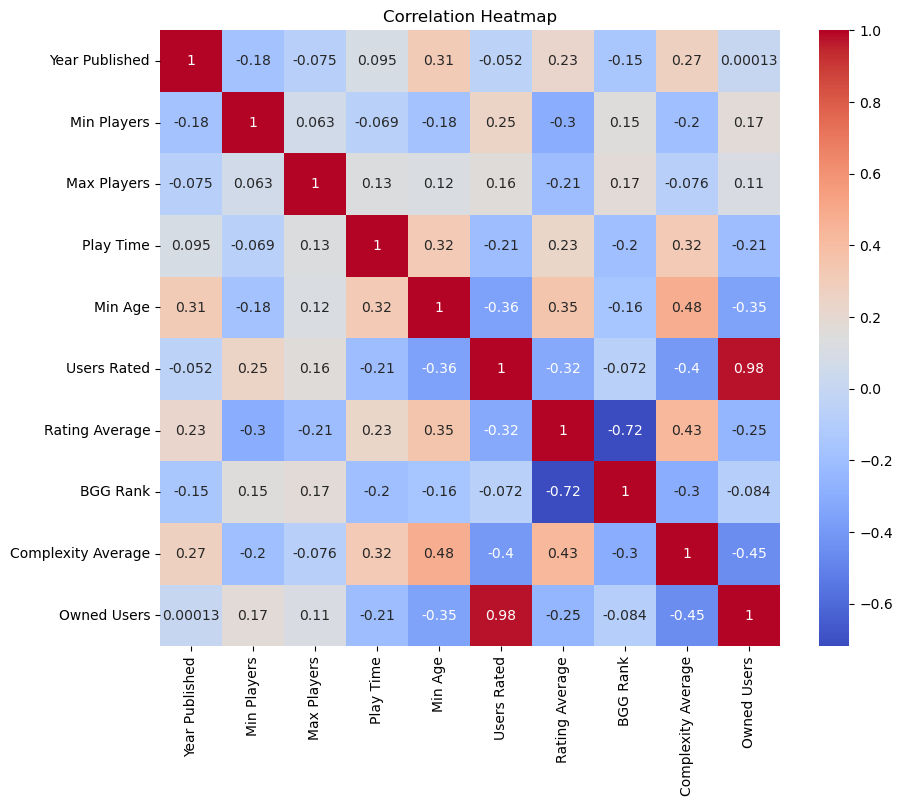

In [35]:
#Visualize Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [36]:
# Count of mechanics
df['Mechanics Count'] = df['Mechanics'].apply(lambda x: len(str(x).split(',')))

# Count of domains
df['Domains Count'] = df['Domains'].apply(lambda x: len(str(x).split(',')))

# Drop original text columns
df = df.drop(columns=["Mechanics", "Domains"])

# Show the first few rows
df.head()


,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics Count,Domains Count
0,2017,1,4,120,14,42055,8.79,1,3.86,68323,19,2
1,2015,2,4,60,13,41643,8.61,2,2.84,65294,8,2
2,2018,2,4,120,14,19217,8.66,3,3.91,28785,9,1
3,2016,1,5,120,12,64864,8.43,4,3.24,87099,12,1
4,2017,3,6,480,14,13468,8.70,5,4.22,16831,12,2


In [37]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Rating Average'])
y = df['Rating Average']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train size: {X_train.shape[0]} samples")
print(f"Test size: {X_test.shape[0]} samples")

Train size: 79 samples
Test size: 20 samples


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Absolute Error (MAE): {mae:.4f}")
print(f"Linear Regression - Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Linear Regression - R² Score: {r2:.4f}")




Linear Regression - Mean Absolute Error (MAE): 0.1616
Linear Regression - Root Mean Squared Error (RMSE): 0.2568
Linear Regression - R² Score: 0.3148


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"Random Forest - R² Score: {r2_rf:.4f}")


Random Forest - Mean Absolute Error (MAE): 0.0642
Random Forest - Root Mean Squared Error (RMSE): 0.0864
Random Forest - R² Score: 0.9225


In [40]:
#Feature Selection

# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top important features
print(feature_df.head())


           Feature  Importance
6         BGG Rank    0.553792
5      Users Rated    0.244780
0   Year Published    0.076718
8      Owned Users    0.050268
9  Mechanics Count    0.022002


In [41]:
#Hyperparameter Tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees
    'max_depth': [None, 10, 20, 30],        # Max depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples at leaf node
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7]  # Updated valid options
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, 
                           n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_best = best_rf_model.predict(X_test)

# Evaluation metrics for the optimized model
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

# Print results for the optimized model
print(f"Optimized Random Forest - MAE: {mae_best:.4f}")
print(f"Optimized Random Forest - RMSE: {rmse_best:.4f}")
print(f"Optimized Random Forest - R²: {r2_best:.4f}")


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Optimized Random Forest - MAE: 0.0644
Optimized Random Forest - RMSE: 0.0863
Optimized Random Forest - R²: 0.9226


In [42]:
#Hyperparameter Tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameters to search over
param_dist = {
    'n_estimators': randint(50, 200),      # Random search for number of trees
    'max_depth': [None, 10, 20, 30],       # Depth of trees
    'min_samples_split': randint(2, 10),   # Random search for min_samples_split
    'min_samples_leaf': randint(1, 5),     # Random search for min_samples_leaf
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7],  # Updated valid options
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, 
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, 
                                   scoring='neg_mean_squared_error', random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_random_params = random_search.best_params_
best_rf_random_model = random_search.best_estimator_

# Evaluate the optimized model
y_pred_random_best = best_rf_random_model.predict(X_test)

# Evaluation metrics for the optimized model
mae_random_best = mean_absolute_error(y_test, y_pred_random_best)
rmse_random_best = np.sqrt(mean_squared_error(y_test, y_pred_random_best))
r2_random_best = r2_score(y_test, y_pred_random_best)

# Print results for the optimized model
print(f"Optimized Random Forest (Randomized Search) - MAE: {mae_random_best:.4f}")
print(f"Optimized Random Forest (Randomized Search) - RMSE: {rmse_random_best:.4f}")
print(f"Optimized Random Forest (Randomized Search) - R²: {r2_random_best:.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Optimized Random Forest (Randomized Search) - MAE: 0.0588
Optimized Random Forest (Randomized Search) - RMSE: 0.0814
Optimized Random Forest (Randomized Search) - R²: 0.9312


In [43]:
import pickle

# Save the GridSearchCV optimized Random Forest model
with open("GridSearchCV", "wb") as grid_file:
    pickle.dump(best_rf_model, grid_file)

# Save the RandomizedSearchCV optimized Random Forest model
with open("RandomizedSearchCV", "wb") as random_file:
    pickle.dump(best_rf_random_model, random_file)